<a href="https://colab.research.google.com/github/julia-sokol/Cheching-git2/blob/master/Deep_Learning_for_the_Life_Sciences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install deepchem


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 31.8 MB/s eta 0:00:00


#Handling Dataset: Dataset object

In [ ]:
import deepchem as dc
import numpy as np

x = np.random.random((4, 5))
y = np.random.random((4, 1))

dataset = dc.data.NumpyDataset(x, y)

# We can unwrap the dataset object to get at the original arrays that we stored inside:
print(dataset.X)

# Note that these arrays are the same as the original arrays x and y:
np.array_equal(x, dataset.X)


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


[[0.09671117 0.07083815 0.93516128 0.32838675 0.54867976]
 [0.81982269 0.36819602 0.0448289  0.06738849 0.55714923]
 [0.02359447 0.50457147 0.20094097 0.32121895 0.16067396]
 [0.11801438 0.33191974 0.10084576 0.9825433  0.71926731]]


True

# Training a Premade Model to Predict Toxicity of Molecules

Loading a data

In [ ]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21()

# 1 Tasks:

# In : len(tox21_tasks)
# Out: 12
#  Each of the 12 tasks here corresponds with a particular biological experiment. In this
# case, each of these tasks is for an enzymatic assay which measures whether the mole‐
# cules in the Tox21 dataset bind with the biological target in question.

train_dataset, valid_dataset, test_dataset = tox21_datasets

# In : train_dataset.X.shape
# Out: (6264, 1024)

# In : np.shape(train_dataset.y)
# Out: (6264, 12)
np.shape(train_dataset.y)

# There are 12 data points, also known as labels, for each sample. These correspond to
# the 12 tasks we discussed earlier.



Checking missing labels (y)

In [ ]:
# The actual experimental dataset for Tox21 did not
# test every molecule in every biological experiment. That means that some of these
# labels are meaningless placeholders.
# We can check the dataset’s w
# field, which records its weights. Whenever we compute the loss function for a model,
# we multiply the term associated with each sample-task pair by its w. If the corresponding label is missing, the weight is 0.

train_dataset.w.shape
# Out: (6264, 12)

np.count_nonzero(train_dataset.w == 0)
# Out: 13002

# Of the 6,264 × 12 = 75,168 elements in the array of labels, only 62,166 were actually measured The other 13,002 correspond to missing measurements and should be
# ignored. You might ask, then, why we still keep such entries around. The answer is
# mainly for convenience; irregularly shaped arrays are much harder to reason about
# and deal with in code than regular matrices with an associated set of weights.




Examining transformers

In [ ]:
transformers

# BalancingTransformer handles imbalanced data. It adjusts the weights for individual data points in the loss function so that
# the total weight assigned to every class is the same.

Training model with models

In [ ]:
# DeepChem’s dc.models submodule contains a variety of
# different life science–specific models. All of these various models inherit from the
# parent class dc.models.Model.


# 1 Create the model
# layer_sizes is a list of widths of fully connected hidden layers
model = dc.models.MultitaskClassifier(n_tasks=12,
  n_features=1024,
  layer_sizes=[1000])

# 2 Training
# In an ideal world, you would need just one epoch, bc you would reach a
# well-optimized model before running out of data. In practice, there usually isn’t
# enough training data for that, so you run out of data before the model is fully trained.
# You then need to start reusing data, making additional passes through the dataset.
# This lets you train models with smaller amounts of data, but the more epochs you
# use, the more likely you are to end up with an overfit model.

model.fit(train_dataset, nb_epoch=10)

0.49126462936401366

Evaluate the performance of the trained model

In [ ]:
# 1 The DeepChem class dc.metrics.Metric provides a general way to specify metrics for models.

# 2  ROC AUC theory:
#  We want to classify molecules as toxic or nontoxic, but the model
# outputs continuous numbers, not discrete predictions. In practice,
# you pick a threshold value and predict that a molecule is toxic
# whenever the output is greater than the threshold. A low threshold
# will produce many false positives (predicting a safe molecule is
# actually toxic). A higher threshold will give fewer false positives but
# more false negatives (incorrectly predicting that a toxic molecule is
# safe).  If there exists any threshold value
# for which every sample is classified correctly, the ROC AUC score
# is 1. At the other extreme, if the model outputs completely random
# values unrelated to the true classes, the ROC AUC score is 0.5.


# 3 Evaluate
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)

train_scores = model.evaluate(train_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)

print(train_scores)
print(test_scores)


# 4 Reason about the output
# Out
# {'mean-roc_auc_score': 0.9659541853946179}
# {'mean-roc_auc_score': 0.7915464001982299}
# Notice that our score on the training set (0.96) is much better than our score on the
# test set (0.79). This shows the model has been overfit.

{'mean-roc_auc_score': 0.9585963273822548}
{'mean-roc_auc_score': 0.6856379388070523}


# Create a New Deep Learning Architecture
## Convolutional neural network on the MNIST digit recognition dataset

In [ ]:
# 1
# dc.models.TensorGraph class, which provides a framework for building deep architectures in DeepChem.

# 2
# Where to used premade and when to use your own architecture?
# If you have a well-debugged canned architecture for a problem, it will
# likely make sense to use it. But if you’re working on a new dataset
# where no such architecture has been put together, you’ll often have
# to create a custom architecture.

# 3 downloading mnist
!mkdir MNIST_data
!cd MNIST_data

The following code does not work. Just read through, do not run it

In [ ]:
! pip install tensorflow_datasets
import tensorflow_datasets as tfds
mnist = tfds.load(name='mnist')


In [ ]:
!pip install -q git+http://github.com/tensorflow/examples.git


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

In [ ]:
import deepchem as dc
import tensorflow as tf
import deepchem.models.tensorgraph.layers as layers

# 1 Prepare the dataset
train_dataset = dc.data.NumpyDataset(mnist.train.images, mnist.train.labels)
test_dataset = dc.data.NumpyDataset(mnist.test.images, mnist.test.labels)

# 2
# Create the model object
# The model_dir option specifies a directory where the model’s parameters should be saved.
model = dc.models.TensorGraph(model_dir='mnist')

# 3
# Note that since TensorGraph inherits from Model, this object is an instance of
# dc.models.Model and supports the same fit() and evaluate() functions we saw
# previously.
# In : isinstance(model, dc.models.Model)
# Out: True

# 4
# Create the input and output layers in the computational graph, which acts as a placeholder for the input data.
# None stands for 'any dimension'
feature = layers.Feature(shape=(None, 784))
label = layers.Label(shape=(None, 10))

# 5
# In order to apply convolutional layers to our input, we need to convert our flat feature
# vectors into matrices of shape (28, 28). To do this, we will use a Reshape layer:
make_image = layers.Reshape(shape=(None, 28, 28), in_layers=feature)

# 6
# Create convolutional layers:
# the 3rd parameter indicates the data which is input to the layer
conv2d_1 = layers.Conv2D(num_outputs=32, activation_fn=tf.nn.relu,
 in_layers=make_image)
conv2d_2 = layers.Conv2D(num_outputs=64, activation_fn=tf.nn.relu,
 in_layers=conv2d_1)

# 7
# Create a fully-connected layer called Dense:

# 1) flatten the output from convolutional level:
# the output of Conv2D layers is 2D, so we will first need to apply a Flat
# ten layer to flatten our input to one dimension (more precisely, the Conv2D layer pro‐
# duces a 2D output for each sample, so its output has three dimensions; the Flatten
# layer collapses this to a single dimension per sample, or two dimensions in total)
flatten = layers.Flatten(in_layers=conv2d_2)
dense1 = layers.Dense(out_channels=1024, activation_fn=tf.nn.relu,
 in_layers=flatten)

# 2) create the layer
# The out_channels argument in a Dense layer specifies the width of the layer.
dense2 = layers.Dense(out_channels=10, activation_fn=None, in_layers=dense1)

#8
#  We now want to hook this output up to a loss function, so we can train the output to accurately predict classes. We will use the
# SoftMaxCrossEntropy loss to perform this form of training:

# description is below
smce = layers.SoftMaxCrossEntropy(in_layers=[label, dense2])
loss = layers.ReduceMean(in_layers=smce)
model.set_loss(loss)

# Note that the SoftMaxCrossEntropy layer accepts both the labels and the output of
# the last Dense layer as inputs. It computes the value of the loss function for every
# sample, so we then need to average over all samples to obtain the final loss. This is
# done with the ReduceMean layer, which we set as our model’s loss function by calling
# model.set_loss().

# 9
# If we want to obtain per-class out‐put probabilities. We’ll add this output to model with model.add_output():
output = layers.SoftMax(in_layers=dense2)
model.add_output(output)

# 10 train the model
model.fit(train_dataset, nb_epoch=10)

# 11 evaluate accuracy
metric = dc.metrics.Metric(dc.metrics.accuracy_score)

train_scores = model.evaluate(train_dataset, [metric])
test_scores = model.evaluate(test_dataset, [metric])

ModuleNotFoundError: No module named 'deepchem.models.tensorgraph'

# Machine Learning for Molecules

Purpose: substitute the random search for molecules with desired properties with testing molecules that ml models predicted
to have the desired properties.

1. Transform chemical formulas into vectors of numbers that
can then be passed to learning algorithms -- molecule featurizauion.

2. Select learning algorithm.

Important molecular topics to review:

1. Types of molecular bonds.
2. Molecular conformations.
3. Chilarity: molecules have identical molecular graphs, so ML models that depend only on molecular graphs cannot properly distinguish between them.

Example:
 The R form of thalidomide is an effective sedative, while
the S form is teratogenic and has been shown to cause severe birth defects. These dif‐
ficulties are further compounded by the fact that thalidomide interconverts, or race‐
mizes, between the two different forms in the body.

## Featurization

There are some deep learning models that directly accept SMILES strings as
their inputs, attempting to learn to identify meaningful features in the text represen‐
tation. But much more often, we first convert the string into a different representa‐
tion (or featurize it) better suited to the problem at hand.

1. Extended-Connectivity Fingerprints  (ECFPs)
Vectors of 1s and 0s that represent the presence or absence of specific features in a molecule.
They take molecules of
arbitrary size and convert them into fixed-length vectors.

The algorithm
begins by considering every atom independently and looking at a few properties of
the atom: its element, the number of covalent bonds it forms, etc. Each unique com‐
bination of these properties is a feature, and the corresponding elements of the vector
are set to 1 to indicate their presence. The algorithm then works outward, combining
each atom with all the ones it is bonded to. This defines a new set of larger features,
and the corresponding elements of the vector are set. The most common variant of
this technique is the ECFP4 algorithm, which allows for sub-fragments to have a
radius of two bonds around a central atom.

2. Molecular Descriptors

These usually correspond to various computed quantities
that describe the molecule’s structure.
This featurization is obviously more useful for some problems than others. It will
tend to work best for predicting things that depend on relatively generic properties of
the molecules. It is unlikely to work for predicting properties that depend on the
detailed arrangement of atoms.

3. Graph Convolutions

Graph convolutional networks take the same idea as in image recognition and apply it to graphs. Just as a reg‐
ular CNN begins with a vector of numbers for each pixel, a graph convolutional network begins with a vector of numbers for each node and/or edge. When the graph
represents a molecule, those numbers could be high-level chemical properties of each
atom, such as its element, charge, and hybridization state. Just as a regular convolu‐
tional layer computes a new vector for each pixel based on a local region of its input,
a graph convolutional layer computes a new vector for each node and/or edge. The
output is computed by applying a learned convolutional kernel to each local region of
the graph, where “local” is now defined in terms of edges between nodes. For exam‐
ple, it might compute an output vector for each atom based on the input vector for
that same atom and any other atoms it is directly bonded to.

There are many different variants of these models all available through DeepChem.

limitation: the calculation is based solely on the molecular graph.
They receive no information about the molecule’s conformation, so they cannot hope
to predict anything that is conformation-dependent. This makes them most suitable
for small, mostly rigid molecules.

In [ ]:
1.
smiles = ['C1CCCCC1', 'O1CCOCC1'] # cyclohexane and dioxane
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
feat = dc.feat.CircularFingerprint(size=1024)
arr = feat.featurize(mols)
# arr is a 2-by-1024 array containing the fingerprints for
# the two molecules

2.
feat = dc.feat.RDKitDescriptors()
arr = feat.featurize(mols)
# arr is a 2-by-111 array containing properties of the
# two molecules`



## Training a Model to Predict Solubility

In [ ]:
!pip install deepchem


In [ ]:
import deepchem as dc
import numpy as np

#1 Load the data
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

# Notice that when downloading the data we specify the option featurizer='GraphConv'.
#  We are going to use a
# graph convolutional model, and this tells MoleculeNet to transform the SMILES
# string for each molecule into the format required by the model.

In [ ]:
!pip install tensorflow==2.10.0 # Or an earlier version where 'legacy' optimizers are supported
!pip install keras==2.10.0 # Or a corresponding Keras version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [ ]:
# from deepchem.models import GraphConvModel

model = dc.models.GraphConvModel(1, mode='regression', dropout=0.2, batch_normalize=False)
model.fit(train_dataset, nb_epoch=100)

# We specify that this is a regression model, meaning that the
# labels are continuous numbers and the model should try to reproduce them as accu‐
# rately as possible

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(333,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(333, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(1008,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16:0", shape=(1008, 64), dtype=float32), dense

0.06357300758361817

In [ ]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print(model.evaluate(train_dataset, [metric], transformers))
print(model.evaluate(test_dataset, [metric], transformers))

{'pearson_r2_score': 0.9463621001498629}
{'pearson_r2_score': 0.7194975637919466}


Using the model to make a prediction for other molecules

In [ ]:
# 1) Create a list of strings-smiles
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
 'CCOC(=O)CC',
 'CSc1nc(NC(C)C)nc(NC(C)C)n1',
 'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
 'Cc1cc2ccccc2cc1C']

from rdkit import Chem
# 2) This function takes a SMILES string as input and returns a molecule object that
# represents the chemical structure.`
mols = [Chem.MolFromSmiles(s) for s in smiles]

# 3) #  As we are going to use a
# graph convolutional model, this featurizer transforms the SMILES
# string for each molecule into the format required by the model.
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

# 4) run the prediction
predicted_solubility = model.predict_on_batch(x)



## MoleculeNet

At http://moleculenet.ai you
can view data on how well a collection of standard models perform on each of the
datasets, giving insight into how your own method compares to established techni‐
ques.

## SMARTS Strings

Used where we
want to determine whether atoms in a molecule match a particular pattern

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

# 1) write a list of smiles
smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]

# 2) convert smile's strings into molecule objects
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

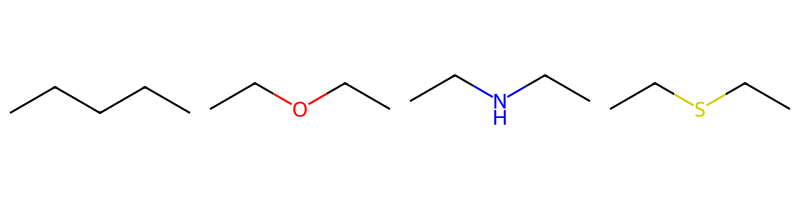

In [ ]:
# 3) define the pattern you want to match
query = Chem.MolFromSmarts("CCC")
# query = Chem.MolFromSmarts("C*C")
# query = Chem.MolFromSmarts("C[C,N,O]C")
# see more in Daylight Theory Manual

# 4) The method used in list comprehension returns the indices of the molecule’s
#  atoms that match a substructure query.
match_list = [mol.GetSubstructMatch(query) for mol in
mol_list]

# 5) visualize molecules
MolsToGridImage(mols=mol_list, molsPerRow=4,
                highlightAtomLists=match_list)

#  Note also that there are multiple ways that the SMARTS pattern
# could match the first molecule in this figure—it could match three adjacent carbon
# atoms by starting at the first, second, or third carbon atom. There are additional
# functions in RDKit that will return all possible SMARTS matches, but we won’t cover
# those now.



# Biophysical Machine Learning

## Use-case for data science:

1.
We will explore in depth the problem of predicting how
small drug-like molecules bind to a protein of interest in the human body.

We will work through an indepth case study on constructing a protein–ligand binding interaction model. For
experimentation,we will introduce the PDBBind dataset, which contains a collection
of experimentally determined protein–ligand structures. We will demonstrate how to
featurize this dataset with DeepChem. We will then build some models, both deep
and simpler, on these featurized datasets and study their performance.

2.
it’s
extremely important to realize that in reality, any given drug is
going to interact with many different subsystems in the body. The
study of such multifaceted interactions is broadly called polyphar‐
macology.
At present, computational methods for dealing with polypharma‐
cology are still relatively undeveloped, so the gold standard for test‐
ing for polypharmacological effects remains animal and human
experimentation. As computational techniques mature, this state of
affairs may shift over the next few years.

3.
 predicting 3D protein structures computationally.

1) homology modeling.
proteins-homologs that recently diverged from each other probably have similar structures. first, look for a
homolog whose structure is already known, then try to adjust it based on differences
between the sequences of the two proteins.
the thing is, you need to know the structure of a homologous protein.

2) physical modeling.
Using knowledge of the laws of phys‐
ics, you try to explore many different conformations the protein might take on and
predict which one will be most stable.

 requires enormous amounts of
computing time.  Even today it is
only practical for small, fast-folding proteins.
it requires approximations to speed up the calculation, and those reduce the accuracy of the
result. Physical modeling will often predict the right structure, but not always.


## Methods for determining the structures of proteins:
1. X-ray crystallography
Limitations: slow, expensive, static snapshot while many proteins are flexible and may take on a range of structures, packing the protein into a crys‐
tal may alter its structure, so the result might be different from its structure in a living cell.
2. nuclear magnetic resonance (NMR for short)
Advantages: can be used for those that do not form a crystal, produces an ensemble of structures representing the range of shapes
the protein can take on in solution.
Limitations: requires a highly concentrated solution, so it is mostly limited to small,
highly soluble proteins.
3. cryo-electron
microscopy (cryo-EM for short).
Unlike crystallography and NMR, it
works for large proteins that do not crystallize.

Protein Data Bank
https://www.rcsb.org/

## Protein theory:

i. The start of the amino acid chain is typically referred to as the. N-terminus, while the
end of the chain is called the C-terminus.

ii. Peptides. Small chains of amino acids are commonly
called peptides, while longer chains are called proteins. Peptides are too small to have
complex 3D structures, but the structures of proteins can be very complicated.

iii. It’s worth noting that while most proteins take a rigid shape, there are also intrinsi‐
cally disordered proteins which have regions that refuse to take rigid shapes. They are challenging to handle computationally.

iv. signaling transduction in cells often passes messages via the mechanism of a protein binding to another molecule. so the molecule is delivered via the bloodstream, binds the protein in the cell membrane and protein initiates the response of the cell. This is how hormones work. We want to figure out how to impact the behaviour of the cell ourselves.
 Other times, the molecule binding to the protein is foreign: possibly a drug we’ve created to manipulate the protein, possibly a toxin that interferes with its function.

 Why determining how binding happens is hard:
 A tiny change in the positions of just a few atoms can determine
whether or not a molecule binds to a protein. Furthermore, many proteins are flexible and constantly moving. A protein might be able to bind a molecule when it’s in certain conformations, but not when it’s in others.

## Biophysical Featurizations

i)

grid featurization

explicitly searches a 3D structure (represented in the format about which you can read below)
for the presence of critical physical interactions such as hydrogen bonds and salt
bridges (more on these later), which are known to play an important role in deter‐
mining protein structure. So the human explicitly tells the algorithm which interactions to look for. The advantage of this technique is that we can rely upon a
wealth of known facts about protein physics. The weakness, of course, is that we are
bound by known physics and lessen the chance that our algorithms will be able to
detect new physics.

ii)

atomic featurization

 which simply pro‐
vides a processed representation of the 3D positions and identities of all atoms in the
system (what this representation is read below). This makes the challenge for the learning algorithm considerably harder,
since it must learn to identify critical physical interactions, but it also makes it feasi‐
ble for learning algorithms to detect new patterns of interesting behavior.

iii) Fingerprints

 These fin‐
gerprints count the number of fragments of a given type in the molecule, then use a
hash function to fit these fragment counts into a fixed-length vector.

 insufficient to compute the geometry of the system, the knowl‐
edge of present fragments can nevertheless be useful for machine learning systems as it can be
strongly indicative of some molecular events.

PDB Files and Their Pitfalls

Such files are sim‐
ply text files that contain descriptions of the atoms in the structure
and their positions in coordinate space relative to one another.
Often, an experiment will fail to have ade‐
quate resolution to completely specify a portion of the protein’s
structure. Such regions are left unspecified in the PDB file, so it’s
common to find that many atoms or even entire substructures of
the protein are missing from the core structure.
 DeepChem will often attempt to do the “right”
thing and algorithmically fill in such missing regions. It’s important
to note that this cleanup is only approximate, and there’s still no
entirely satisfactory replacement to having an expert human peer at
the protein structure .

Some details of  RdkitGridFeaturizer implementation:

The data is represented in the format:


Most operations trans‐
form a molecule with N atoms into a NumPy array of shape (N, 3) and then perform
a variety of extra computations starting from these arrays.
The (N, 3) position
array doesn’t distinguish atom types, so you also need to provide another array that
lists the atomic number of each atom. As a second implementation-driven note, com‐
puting pairwise distances between two position arrays of shape (N, 3) can be very
computationally expensive. It’s useful to create “neighbor lists” in a preprocessing
step, where the neighbor list maintains a list of neighboring atoms close to any given
atom.
DeepChem provides a dc.feat.ComplexNeighborListFragmentAtomicCoordinates
featurizer that handles much of this for you. We will not discuss it further in this
chapter, but it’s good to know that it exists as another option.

Data in this same format can be passed to ML algorithm so that it could learn
for itself what features were important.

RdkitGridFeaturizer searches for:

a) Hydrogen bonds

The RdkitGridFeaturizer attempts to count the hydrogen bonds present in a struc‐
ture by checking for pairs of protein/ligand atoms of the right types that are suitably
close to one another. This requires applying a cutoff to the distance, which is some‐
what arbitrary. In reality there is not a sharp division between atoms being bonded
and not bonded. This may lead to some misidentified interactions, but empirically, a
simple cutoff tends to work reasonably well.

b) Salt bridges

in proteins are bonds between oppositely charged residues that are sufficiently close to each other to experience electrostatic attraction. They contribute to protein structure and to the specificity of interaction of proteins with other biomolecules, but in doing so they need not necessarily increase a protein's free energy of unfolding.
The salt bridge most often arises from the anionic carboxylate (RCOO−) of either aspartic acid or glutamic acid and the cationic ammonium (RNH3+) from lysine or the guanidinium (RNHC(NH2)2+) of arginine.

The grid featurizer attempts to detect salt bridges by explicitly checking for pairs of
amino acids (such as glutamic acid and lysine) that are known to form such interac‐
tions, and that are in close physical proximity in the 3D structure of the protein

c)pi-stacking interactions

occur when two aromatic rings “stack” on
top of each other.  Importantly, pi-stacking interactions can be found in ligandprotein interactions, since aromatic rings are often found in small molecules. The
grid featurizer counts these interactions by detecting the presence of aromatic rings
and checking for the distances between their centroids and the angles between their
two planes.

Keep this
in mind, and note that when someone says a salt bridge exists, what
they really mean is that in some statistically average sense, a salt
bridge is likely present more often than not at a particular location.

# Model to predict the binding affinity for a complex given the protein–ligand structure.

Data and goal:

The PDBBind dataset contains a large number of biomolecular crystal structures and
their binding affinities.
The large majority of these are protein–ligand complexes, but the dataset also
contains protein–protein, protein–nucleic acid, and nucleic acid–ligand complexes.
For our purposes, we will focus on the protein–ligand subset. The full dataset con‐
tains close to 15,000 such complexes, with the “refined” and “core” sets containing
smaller but cleaner subsets of complexes. Each complex is annotated with an experi‐
mental measurement of the binding affinity for the complex. The learning challenge
for the PDBBind dataset is to predict the binding affinity for a complex given the pro‐
tein–ligand structure.